# Appendix M1: Photovoltaics

## Introduction

In SAP10 and RdSAP10, it is possible to specify that a dwelling has one or more solar photovoltaic systems installed. These PV systems will typically be located on the roof of the dwelling and will generate electricity which can be used directly by the house or exported to the mains electricity grid.

The method for solar PV systems is described in Appendix M1 in the [SAP10.2 Specification](https://bregroup.com/documents/d/bre-group/sap-10-2-14-03-2025).

## SAP10 XML files

In SAP10 XML files, solar PV systems are specified as a [`<PV-Array>`](https://stevenkfirth.github.io/sap10calcs/sap_schema_19_1_0.html#SAP-Compliance-Report/SAP-Report/SAP10-Data/SAP-Property-Details/SAP-Energy-Source/PV-Arrays/PV-Array) with the following child elements:
- [`<Peak-Power>`](https://stevenkfirth.github.io/sap10calcs/sap_schema_19_1_0.html#SAP-Compliance-Report/SAP-Report/SAP10-Data/SAP-Property-Details/SAP-Energy-Source/PV-Arrays/PV-Array/Peak-Power): The rating of the solar PV system in kWp.
- [`<Orientation`](https://stevenkfirth.github.io/sap10calcs/sap_schema_19_1_0.html#SAP-Compliance-Report/SAP-Report/SAP10-Data/SAP-Property-Details/SAP-Energy-Source/PV-Arrays/PV-Array/Orientation): The orientation of the solar PV system: One of:
  - "North" (1)
  - "North East" (2)
  - "East" (3)
  - "South East" (4)
  - "South" (5)
  - "South West" (6)
  - "West" (7)
  - "North West" (8)
  - "To be used when the pitch is horizontal" (NR)
  - "not recorded - for backwards compatibility only; do not use" (NR)
- [`<Pitch>`](https://stevenkfirth.github.io/sap10calcs/sap_schema_19_1_0.html#SAP-Compliance-Report/SAP-Report/SAP10-Data/SAP-Property-Details/SAP-Energy-Source/PV-Arrays/PV-Array/Pitch): The pitch (angle from the horizontal) of the solar PV system: One of:
  - "horizontal" (1)
  - "30 degrees" (2)
  - "45 degrees" (3)
  - "60 degrees" (4)
  - "vertical" (5)
- [`<Overshading>`](https://stevenkfirth.github.io/sap10calcs/sap_schema_19_1_0.html#SAP-Compliance-Report/SAP-Report/SAP10-Data/SAP-Property-Details/SAP-Energy-Source/PV-Arrays/PV-Array/Overshading): The overshading of the PV system. One of:
  - "none or very little" (1)
  - "modest" (2)
  - "significant" (3)
  - "heavy" (4)
  - "severe" (5)
  - "for backwards compatability only; do not use" (ND).
- Plus additional information not required for the calculation.

For example, this is a 2.5 kWp south-facing solar PV system on a 30 degree pitch roof with modest overshading:
```xml
<PV-Arrays>
  <PV-Array>
    <Peak-Power>2.5</Peak-Power>
    <Orientation>5</Orientation>
    <Pitch>2</Pitch>
    <Overshading>2</Overshading>
  </PV-Array>
</PV-Arrays>
```

In SAP10 XML files, solar PV systems can be specified in the [`<SAP-Energy-Source>`](https://stevenkfirth.github.io/sap10calcs/sap_schema_19_1_0.html#SAP-Compliance-Report/SAP-Report/SAP10-Data/SAP-Property-Details/SAP-Energy-Source) and [`<FGHRS-Energy-Source>`](https://stevenkfirth.github.io/sap10calcs/sap_schema_19_1_0.html#SAP-Compliance-Report/SAP-Report/SAP10-Data/SAP-Property-Details/SAP-Heating/Main-Heating-Details/Main-Heating/FGHRS-Energy-Source) (FGHRS = flue gas heat recovery system) elements. A maximum of three solar PV systems (for each element) is allowed.

In addition, the following elements connect the solar PV system to the dwelling's electricity supply and enable the export of PV generated electricity to the mains electricity grid:
- [`<PV-Connection>`](https://stevenkfirth.github.io/sap10calcs/sap_schema_19_1_0.html#SAP-Compliance-Report/SAP-Report/SAP10-Data/SAP-Property-Details/PV-Connection): One of:
  - "not applicable (FGHRS)" (0)
  - "not connected to dwelling’s electricity meter" (1)
  - "connected to dwelling’s electricity meter" (2)
- [`<Is-Dwelling-Export-Capable>`](https://stevenkfirth.github.io/sap10calcs/sap_schema_19_1_0.html#SAP-Compliance-Report/SAP-Report/SAP10-Data/SAP-Property-Details/Is-Dwelling-Export-Capable): One of:
  - True (true)
  - False (false)

## RdSAP10 XML files

In RdSAP10 XML files, solar PV systems are specified in a similar way using the [`<PV-Array>`](https://stevenkfirth.github.io/sap10calcs/rdsap_schema_21_0_0.html#RdSAP-Report/SAP-Data/SAP-Property-Details/SAP-Energy-Source/Photovoltaic-Supply/PV-Arrays/PV-Array) element.

Note that in RdSAP XML files the [`<Photovoltaic-Supply>`](https://stevenkfirth.github.io/sap10calcs/rdsap_schema_21_0_0.html#RdSAP-Report/SAP-Data/SAP-Property-Details/SAP-Energy-Source/Photovoltaic-Supply) element is required. If there is no solar PV system present in the dwelling then this is specified as:

```xml
<Photovoltaic-Supply>
  <None-Or-No-Details>
    <Percent-Roof-Area>0</Percent-Roof-Area>
  </None-Or-No-Details>
</Photovoltaic-Supply>
```

## A sample calculation with a solar PV system

Here is a SAP10 calculation for a dwelling with a 1 kWp PV system:

In [25]:
import sap10calcs
tree, sap_report = sap10calcs.parse_xml('in.xml')
print(sap_report.sap10_data.sap_property_details.sap_energy_source.pv_arrays.display())
response = sap10calcs.calculate(
    input_file = 'in.xml',
    auth_token = None
)
output_dict = response['sap_calculation_output_dict']
print('Annual PV generation (kWh):', output_dict['E_PV'])

<PV-Arrays xmlns="https://epbr.digital.communities.gov.uk/xsd/sap">
  <PV-Array>
    <Peak-Power>1</Peak-Power>
    <Orientation>5 ['South']</Orientation>
    <Pitch>2 ['30 degrees']</Pitch>
    <Overshading>1 ['none or very little']</Overshading>
  </PV-Array>
</PV-Arrays>

Annual PV generation (kWh): 863.6196964310479


This result of 864 kWh per year looks about right using the "rule of thumb" for solar PV generation in the UK climate. The SAP10.2 Specification states:

> In the UK climate, an installation with 1 kWp typically produces about 720 to 940 kWh 
of electricity per year (at favourable orientation and not over shaded, depending on latitude) (p92).

Equation M1 gives the calculation for annual PV electricity generation as:

> 0.8 (m2/kW) * annual solar radiation (kWh/m2) * PV system rating (kWp) * overshading factor

The "0.8" factor seems to be a 'loss factor' of 80%, perhaps accounting for the losses in the system such as the inverter loss, wiring loss etc. The efficiency and area of the PV system are contained within the "PV system rating" value (and the "m2/kW" units on the constant "0.8" term).

In [31]:
#print('Annual horizontal solar radiation (kWh):', )
print('Annual solar radiation on the plane of the PV array (kWh):', output_dict['pv_array_0_annual_solar_radiation'])

Annual solar radiation on the plane of the PV array (kWh): 1079.5246205388098


## Monthly solar PV generation

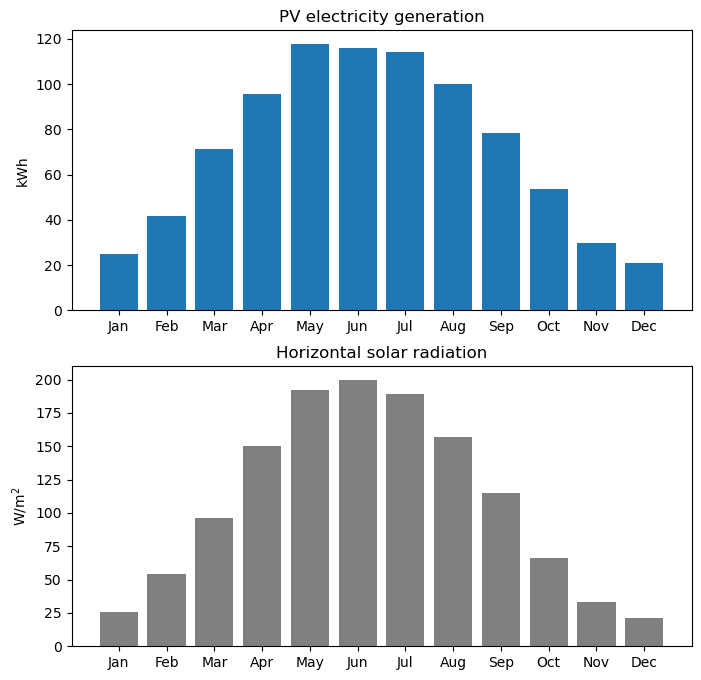

In [26]:
import matplotlib.pyplot as plt
import calendar
x = [calendar.month_name[i][:3] for i in range(1,13)]
y = [output_dict[f'E_PV_{i}'] for i in range(1,13)]
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (8, 8))
ax1.bar(x,y)
ax1.set_title('PV electricity generation')
ax1.set_ylabel('kWh')
y = [output_dict[f'solar_radiation_on_horizontal_plane_{i}'] for i in range(1,13)]
ax2.bar(x,y, color = 'grey')
ax2.set_title('Horizontal solar radiation')
ax2.set_ylabel('W/m$^2$')
plt.show()

In [28]:
output_dict

{'calculation_type': 'Energy rating',
 'region_code': 0,
 'postcode': 'LE11 3TU',
 'postcode_area': 'LE',
 'postcode_district': '11',
 'latitude': 53.5,
 'pcdb_fuel_price_table_name': None,
 'main_heating_1_fghrs_index_number': None,
 'value_1_building_part_1_level_0': 100.0,
 'value_2_building_part_1_level_0': 3.0,
 'value_3_level_0': 300.0,
 'value_4': 100.0,
 'value_5': 300.0,
 'value_6a_total': 0,
 'value_6a': 0.0,
 'value_6b_total': 0,
 'value_6b': 0.0,
 'value_6c_total': 0,
 'value_6c': 0.0,
 'value_6d_total': 0,
 'value_6d': 0.0,
 'value_6e_total': 0,
 'value_6e': 0.0,
 'value_6f_total': 0,
 'value_6f': 0.0,
 'value_7a_total': 0,
 'value_7a': 0.0,
 'value_7b_total': 0,
 'value_7b': 0.0,
 'value_7c_total': 0,
 'value_7c': 0.0,
 'total_value_6a_7c': 0.0,
 'value_8': 0.0,
 'has_pressure_test_been_carried_out_or_is_intended': True,
 'value_9': None,
 'value_10': None,
 'value_11': None,
 'value_12': None,
 'value_13': None,
 'value_14': None,
 'value_15': None,
 'value_16': None,
 '